Statevector([ 7.07106781e-01+0.j,  5.55111512e-17+0.j, -7.07106781e-01+0.j,
             -5.55111512e-17+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j,  0.00000000e+00+0.j],
            dims=(2, 2, 2))


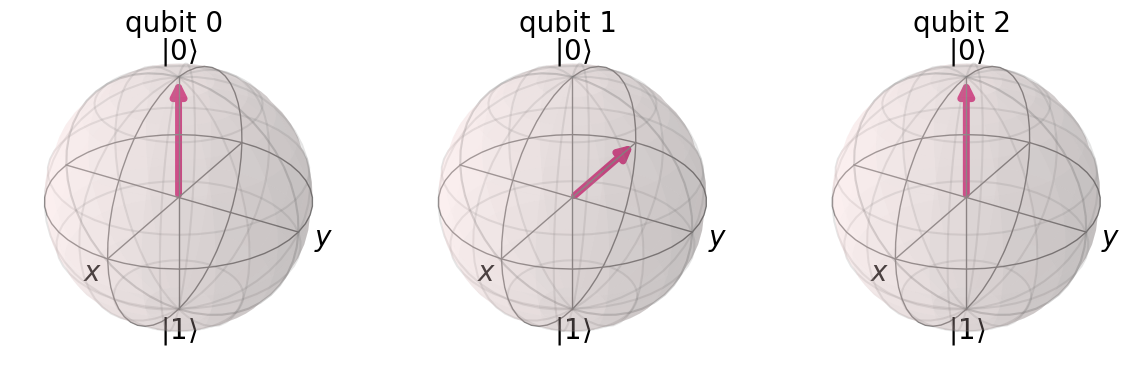

In [1]:
# play with qiskit bloch sphere, figure out the possible gate
import numpy as np
from qiskit.quantum_info.operators import Operator
from qiskit.extensions.unitary import UnitaryGate
solution = Operator((
        1
        / np.sqrt(2)
        * np.array(
            [
                [1, 1, 0, 0, 0, 0, 0, 0],
                [1, -1, 0, 0, 0, 0, 0, 0],
                [0, 0, -1, -1, 0, 0, 0, 0],
                [0, 0, -1, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 0, 1, -1, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 1],
                [0, 0, 0, 0, 0, 0, 1, -1],
            ]
        )
    ))

uni_qc = UnitaryGate(solution)
from qiskit import QuantumCircuit,transpile
qc = QuantumCircuit(3)
qc.h(0)
#qc.z(1)
qc.h(1)
#qc.h(2)
qc.unitary(solution,[0,1,2])
#qc = qc.from_qasm_str(qasm_)
#display(qc.decompose(reps=2).draw())
trans_qc = transpile(qc,basis_gates=['h', 'cx','u3'],optimization_level=3)#backend=Aer.get_backend("aer_simulator_statevector"))
qasm_ = trans_qc.qasm()
#print(qasm_)
#Operator(qc)
from qiskit import execute, Aer
from qiskit.visualization import plot_bloch_multivector

backend = Aer.get_backend("statevector_simulator")
job = execute(qc,backend=backend)
statevector = job.result().get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [2]:
qc = QuantumCircuit(3)
qc.i(0)
qc.i(1)
qc.h(0)
qc.z(2)
qc.cz(2,1)
qc.decompose(reps=3).draw()
#trans_qc = transpile(qc,optimiz)#,basis_gates=['h', 'cx','u3'],optimization_level=0)
#trans_qc.draw()

┌───┐     ┌────────────┐                    
q_0: ───┤ I ├─────┤ U(π/2,0,π) ├────────────────────
        ├───┤    ┌┴────────────┤┌───┐┌─────────────┐
q_1: ───┤ I ├────┤ U3(π/2,0,π) ├┤ X ├┤ U3(π/2,0,π) ├
     ┌──┴───┴───┐└─────────────┘└─┬─┘└─────────────┘
q_2: ┤ U(0,0,π) ├─────────────────■─────────────────
     └──────────┘

In [3]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy

def circuit():
    """
    Succession of gates that will generate the requested matrix.
    This function does not receive any arguments nor does it return any values.
    """
    # @qml.qnode(3)
    # Put your solution here ...
    # You only have to put U3 or CNOT gates
    #qml.Identity(wires=[1])
    qml.U3(0, 0, 0,wires=[1])
    qml.U3(0, 0, 0,wires=[2])
    qml.U3(np.pi/2, 0, np.pi,wires=[0])# Hadamard
    qml.U3(0, 0, np.pi,wires=[2])# PauliZ
    # CZ gate
    qml.U3(np.pi/2, 0, np.pi,wires=[1])
    qml.CNOT(wires=[2,1])
    qml.U3(np.pi/2, 0, np.pi,wires=[1])


In [4]:
from qiskit .visualization import array_to_latex
array_to_latex(qml.matrix(circuit)())

<IPython.core.display.Latex object>

In [5]:
solution = (
        1
        / np.sqrt(2)
        * np.array(
            [
                [1, 1, 0, 0, 0, 0, 0, 0],
                [1, -1, 0, 0, 0, 0, 0, 0],
                [0, 0, -1, -1, 0, 0, 0, 0],
                [0, 0, -1, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 0, 1, -1, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 1],
                [0, 0, 0, 0, 0, 0, 1, -1],
            ]
        )
    )
array_to_latex(solution)

<IPython.core.display.Latex object>

In [6]:
# These functions are responsible for testing the solution.

def run(input: str) -> str:
    matrix = qml.matrix(circuit)().real
    print(circuit)

    with qml.tape.QuantumTape() as tape:
        circuit()

    names = [op.name for op in tape.operations]
    return json.dumps({"matrix": matrix.tolist(), "gates": names})

def check(user_output: str, expected_output: str) -> str:
    parsed_output = json.loads(user_output)
    matrix_user = np.array(parsed_output["matrix"])
    gates = parsed_output["gates"]

    solution = (
        1
        / np.sqrt(2)
        * np.array(
            [
                [1, 1, 0, 0, 0, 0, 0, 0],
                [1, -1, 0, 0, 0, 0, 0, 0],
                [0, 0, -1, -1, 0, 0, 0, 0],
                [0, 0, -1, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 0, 1, -1, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 1],
                [0, 0, 0, 0, 0, 0, 1, -1],
            ]
        )
    )

    assert np.allclose(matrix_user, solution)
    assert len(set(gates)) == 2 and "U3" in gates and "CNOT" in gates


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
<function circuit at 0x7f0a3b3c4040>
Correct!
